# Applying EDA to Your Data
Exploratory Data Analysis is the most exciting phase in data analysis. It help us understand the data better and figure out how to successfully solve the business problem - report our findings, do machine learning, etc.

Download the Superstore dataset from:https://community.tableau.com/docs/DOC-1236 and do the following:

Step 1: Import your data

Step 2: Examine your data using pandas to:

- show information about the number of rows and columns (shape of the data)

- find the mean and median values, the unique values and plot your data to understand how distributed it is; do this for all columns. 

- create and display the correlation matrix; interpret it and tell what are the correlated features (if any)

Don't limit yourself to the suggested steps and do anything else you find to be potentially useful to understand Superstore data better.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#! dir 
# list items in current directory and identify the downloaded xls file

### Load the Superstore dataset

In [3]:
#df = pd.read_excel('m3w4_Superstore.xls', None )

In [4]:
xl = pd.ExcelFile('m3w4_Superstore.xls')

xl.sheet_names  # see all sheet names

['Orders', 'Returns', 'People']

#### The above implies there are three sheets in the dataset that can be explored

## Examining the Orders sheet

In [5]:
df = xl.parse('Orders', index_col=0)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.shape

(9994, 20)

In [8]:
#finding duplicats row
df[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [9]:
#removing duplicates
df = df.drop_duplicates()
df.shape

(9993, 20)

In [10]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 1 to 9994
Data columns (total 20 columns):
Order ID         9993 non-null object
Order Date       9993 non-null datetime64[ns]
Ship Date        9993 non-null datetime64[ns]
Ship Mode        9993 non-null object
Customer ID      9993 non-null object
Customer Name    9993 non-null object
Segment          9993 non-null object
Country          9993 non-null object
City             9993 non-null object
State            9993 non-null object
Postal Code      9993 non-null int64
Region           9993 non-null object
Product ID       9993 non-null object
Category         9993 non-null object
Sub-Category     9993 non-null object
Product Name     9993 non-null object
Sales            9993 non-null float64
Quantity         9993 non-null int64
Discount         9993 non-null float64
Profit           9993 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(13)
memory usage: 1.6+ MB


As displayed above, the dataset doesnt have any null values!

#### Viewing important stats from the numeric columns in the Orders sheet

In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971
std,32065.074478,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Profit (or loss) vs Sales
From the above, it can be seen there were some losses, below this is visualized by the bars below 0

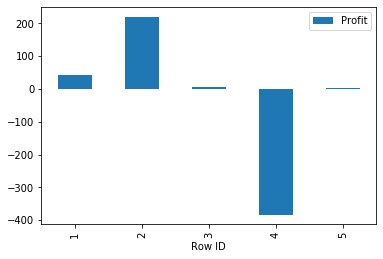

In [12]:
#plotting only head to verify
df.head().plot(kind='bar', y='Profit')

It could be easily said the more sales yielded more profit, except between South and Central Regions

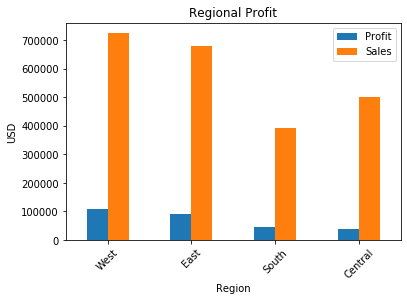

In [13]:
regions = df.groupby('Region')
regional_profit_plot = regions[['Profit', 'Sales']].sum().sort_values('Profit', ascending=False).plot(kind='bar', rot=45)
regional_profit_plot.set_ylabel('USD')
regional_profit_plot.set_title('Regional Profit')
plt.show()

The above plots even makes it more interesting to dig into Sales vs Profits made over the 4 regions

The boxplot below reveals extreme values in the sales and profit columns and even more importantly, losses made becomes more visual.

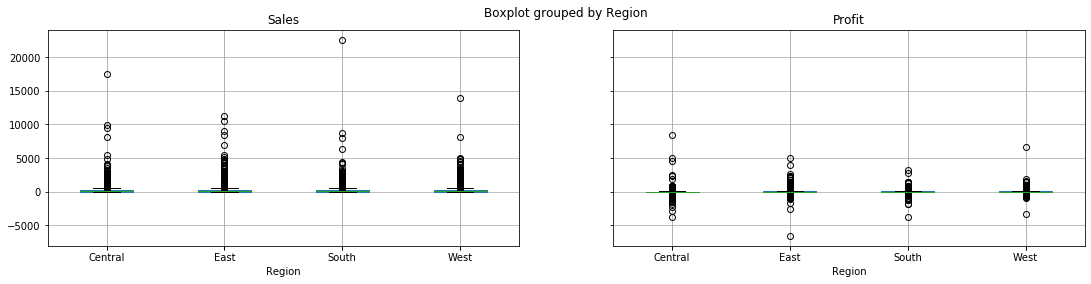

In [14]:
df.boxplot(['Sales', 'Profit'], by='Region', figsize=(18,4));

### Correlation Matrix

the DataFrame.corr() when not specified used Pearson's coefficient. 
This measures the strength and direction of a linear relationship between two variables. Values always range between -1 (strong negative relationship) and +1 (strong positive relationship). Values at or close to zero imply weak or no relationship.

In [15]:
corrMatrix = df.corr()
corrMatrix

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023851,0.012731,0.058471,-0.029968
Sales,-0.023851,1.000000,0.200808,-0.028197,0.479067
Quantity,0.012731,0.200808,1.000000,0.008680,0.066241
Discount,0.058471,-0.028197,0.008680,1.000000,-0.219481
Profit,-0.029968,0.479067,0.066241,-0.219481,1.000000


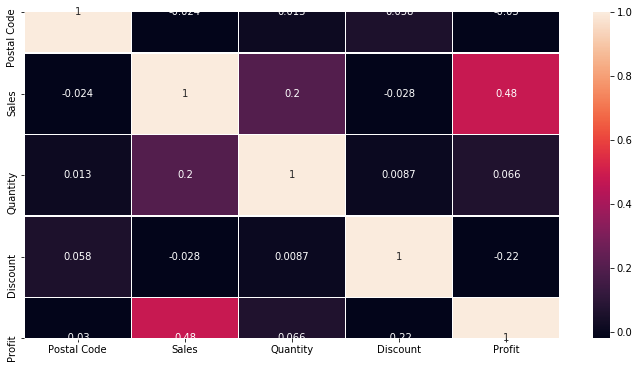

In [16]:
fig, ax = plt.subplots(figsize=(12,6)) 
sn.heatmap(corrMatrix, annot=True, vmin=-.02, linewidths=.5, ax=ax);

Thus to further visualize linearly the correlation of Sales to Profit who's coefficient was determined to be 0.479064

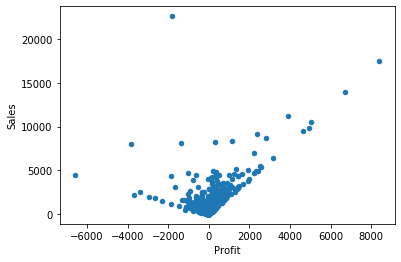

In [17]:
df.plot(kind='scatter', x='Profit', y='Sales')

Thus:
- Perfect:  near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: between ± 0.50 and ± 1, no high correllation exists here
- Moderate degree: between ± 0.30 and ± 0.49, eg. Profit & Sales
- Low degree: When the value lies below ± 0.29, eg. Quantity & Sales
- No correlation: When the value is zero.

**Apart from Sales-Profit pair all other pairs fall between low degree to no correlation**

## Examining the Returns and People sheets

Just to verify if there is any data that could be used in the orders data set

In [18]:
df1 = xl.parse('Returns')
df1.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [19]:
df2 = xl.parse('People')
df2.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


Since df1 is data for returned orders, we can visualize via a pie chart to see what percentage of orders were returned or otherwise

df2 is not useful information for EDA

In [20]:
#checking the shape of dataset and uniqueness of returned order ids
print(df1.shape)
df1['Order ID'].is_unique

(296, 2)


True

In [21]:
# #checking the shape of dataset and uniqueness of order ids
print(df.shape)
df['Order ID'].is_unique

(9993, 20)


False

*This suggests further melting/pivoting in order to get a pie chart for returned vs unreturned...which is beyond this assignment*